# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{base_url}appid={api_key}&units={units}&q="

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | oktyabrskoye
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | moussoro
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | tezu
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | miandrivazo
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | terenos
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | koungou
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | okhotsk
Processing Record 23 of Set 1 | bus

Processing Record 35 of Set 4 | alta gracia
Processing Record 36 of Set 4 | shimoda
Processing Record 37 of Set 4 | monte aprazivel
Processing Record 38 of Set 4 | mahebourg
Processing Record 39 of Set 4 | novoomskiy
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | warrington
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | padilla
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | kaliua
Processing Record 47 of Set 4 | mayo
Processing Record 48 of Set 4 | vestmannaeyjar
Processing Record 49 of Set 4 | brigantine
Processing Record 0 of Set 5 | osypenko
Processing Record 1 of Set 5 | valparaiso
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | quesnel
Processing Record 4 of Set 5 | scarborough
Processing Record 5 of Set 5 | neiafu
Processing Record 6 of Set 5 | opuwo
Processing Record 7 of Set 

Processing Record 31 of Set 8 | berlevag
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | port lincoln
Processing Record 34 of Set 8 | avera
Processing Record 35 of Set 8 | mandalgovi
Processing Record 36 of Set 8 | ilhabela
Processing Record 37 of Set 8 | dudinka
Processing Record 38 of Set 8 | peterhead
Processing Record 39 of Set 8 | dargaville
Processing Record 40 of Set 8 | minab
Processing Record 41 of Set 8 | port-cartier
Processing Record 42 of Set 8 | hunza
City not found. Skipping...
Processing Record 43 of Set 8 | fontenay-le-comte
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | pozo colorado
Processing Record 46 of Set 8 | wahran
City not found. Skipping...
Processing Record 47 of Set 8 | saint anthony
Processing Record 48 of Set 8 | grindavik
Processing Record 49 of Set 8 | kisangani
Processing Record 0 of Set 9 | pokosnoye
Processing Record 1 of Set 9 | fort saint john
City not found. Skipping...
Processing Record 2 of S

Processing Record 20 of Set 12 | tonj
Processing Record 21 of Set 12 | mount isa
Processing Record 22 of Set 12 | vila
Processing Record 23 of Set 12 | zherdevka
Processing Record 24 of Set 12 | zubtsov
Processing Record 25 of Set 12 | caravelas
Processing Record 26 of Set 12 | pimentel
Processing Record 27 of Set 12 | hosingen
Processing Record 28 of Set 12 | ballina
Processing Record 29 of Set 12 | kinango
Processing Record 30 of Set 12 | pout
Processing Record 31 of Set 12 | korla
Processing Record 32 of Set 12 | narsaq
Processing Record 33 of Set 12 | gizo
Processing Record 34 of Set 12 | dzhebariki-khaya
Processing Record 35 of Set 12 | qaqortoq
Processing Record 36 of Set 12 | kaduqli
Processing Record 37 of Set 12 | quirinopolis
Processing Record 38 of Set 12 | gravdal
Processing Record 39 of Set 12 | boden
Processing Record 40 of Set 12 | hami
Processing Record 41 of Set 12 | verkhoyansk
Processing Record 42 of Set 12 | gerash
Processing Record 43 of Set 12 | khatassy
Processin

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,los llanos de aridane,28.6585,-17.9182,18.96,82,0,1.34,ES,1685854807
1,bathsheba,13.2167,-59.5167,28.34,83,75,4.63,BB,1685854807
2,oktyabrskoye,43.0645,44.7417,21.08,68,40,3.00,RU,1685854808
3,nanortalik,60.1432,-45.2371,0.66,92,82,2.45,GL,1685854808
4,lata,40.1629,-8.3327,14.95,98,0,0.32,PT,1685854809


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,los llanos de aridane,28.6585,-17.9182,18.96,82,0,1.34,ES,1685854807
1,bathsheba,13.2167,-59.5167,28.34,83,75,4.63,BB,1685854807
2,oktyabrskoye,43.0645,44.7417,21.08,68,40,3.00,RU,1685854808
3,nanortalik,60.1432,-45.2371,0.66,92,82,2.45,GL,1685854808
4,lata,40.1629,-8.3327,14.95,98,0,0.32,PT,1685854809


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

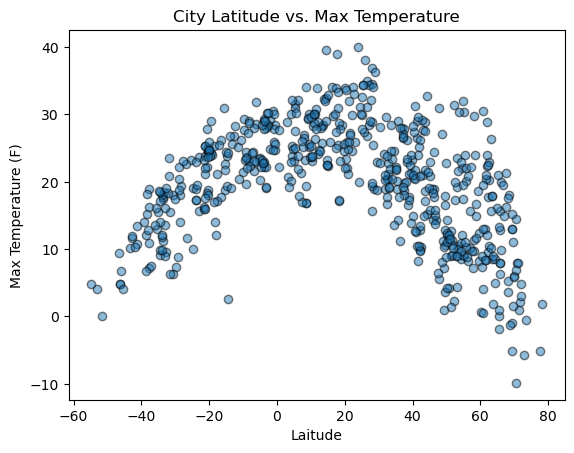

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

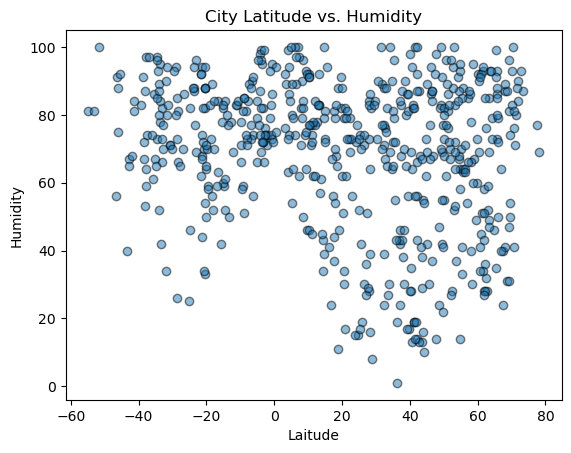

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

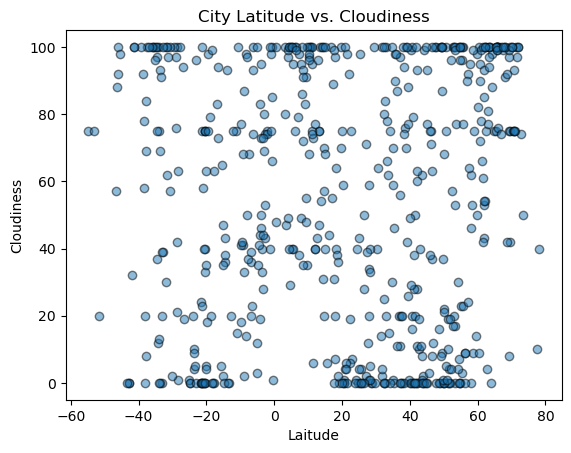

In [60]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

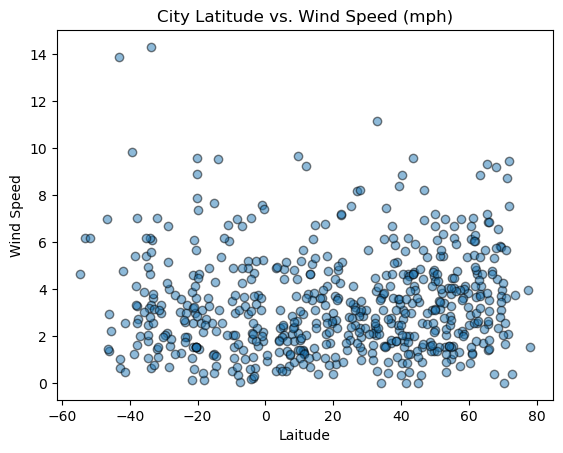

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(x, y)
    #plt.plot(x,regress_values,"r-")
    return line_eq

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,los llanos de aridane,28.6585,-17.9182,18.96,82,0,1.34,ES,1685854807
1,bathsheba,13.2167,-59.5167,28.34,83,75,4.63,BB,1685854807
2,oktyabrskoye,43.0645,44.7417,21.08,68,40,3.00,RU,1685854808
3,nanortalik,60.1432,-45.2371,0.66,92,82,2.45,GL,1685854808
4,lata,40.1629,-8.3327,14.95,98,0,0.32,PT,1685854809


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,mataura,-46.1927,168.8643,4.89,88,100,1.35,NZ,1685854810
10,miandrivazo,-19.5167,45.4667,24.31,59,98,1.46,MG,1685854810
12,terenos,-20.4422,-54.8603,18.84,82,0,3.60,BR,1685854811
13,kaitangata,-46.2817,169.8464,4.79,91,88,1.43,NZ,1685854811
14,chuy,-33.6971,-53.4616,17.40,95,93,0.65,UY,1685854808


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.31x + 31.95


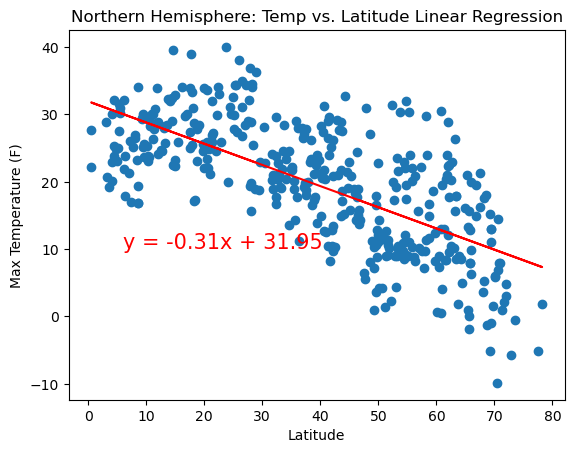

<Figure size 640x480 with 0 Axes>

In [51]:
# Linear regression on Northern Hemisphere  
#x, y values
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Temp vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Northern Hemisphere Lat Temp.png')


Regression line equation is: y = 0.41x + 28.3


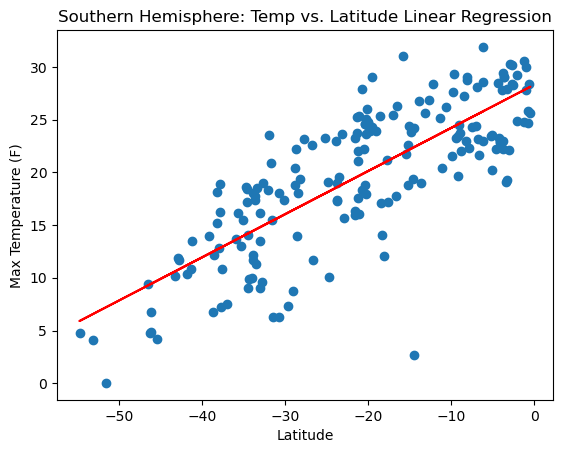

<Figure size 640x480 with 0 Axes>

In [52]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temp vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Southern Hemisphere Lat Temp.png')


Hemisphere Latitude and Temperature Analysis: 

In both the northern and southern hemispheres, there are strong coorilations between the Tempurature and the latitude. As the point gets closer to the equator, we see a raise in temperatures in both hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.08x + 68.86


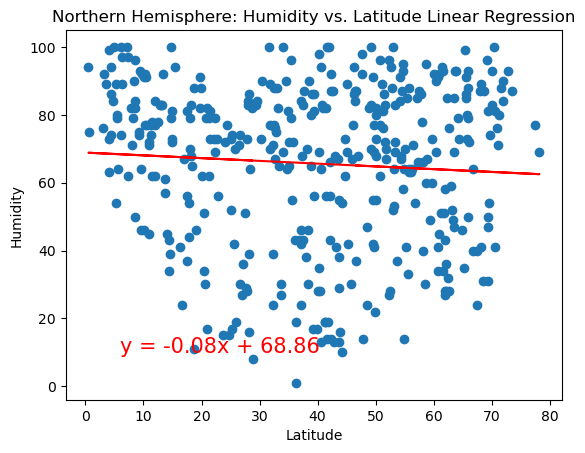

<Figure size 640x480 with 0 Axes>

In [53]:
# Northern Hemisphere
#x, y values
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Northern Hemisphere Lat Humidity.png')


Regression line equation is: y = 0.04x + 76.0


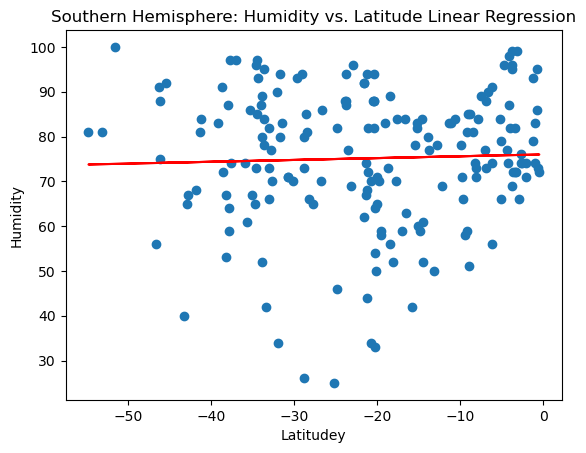

<Figure size 640x480 with 0 Axes>

In [54]:
# Southern Hemisphere
#x, y values
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitudey')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Southern Hemisphere Lat Humidity.png')

Hemisphere Latitude and Humidity Analysis:

In both the northern and southern hemispheres, there are strong coorilations between the humidity and the latitude. As the point gets closer to the equator, we see a raise in humidity in both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.12x + 49.7


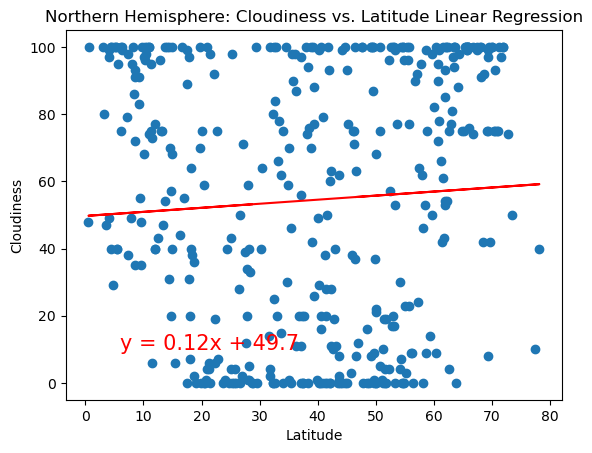

<Figure size 640x480 with 0 Axes>

In [55]:
# Northern Hemisphere
#x, y values
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Northern Hemisphere Lat Cloudiness.png')


Regression line equation is: y = -0.23x + 46.8


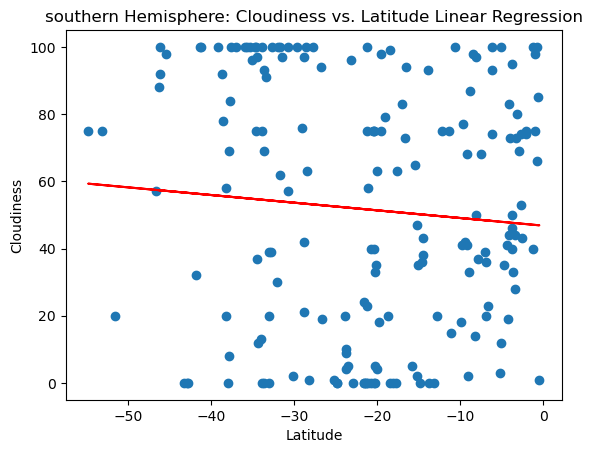

<Figure size 640x480 with 0 Axes>

In [56]:
# Southern Hemisphere
#x, y values
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('southern Hemisphere: Cloudiness vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/southern Hemisphere Lat Cloudiness.png')

Hemisphere Latitude and Cloudiness Analysis: 

In both the northern and southern hemispheres, there are strong coorilations between the humidity and the latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.02x + 2.55


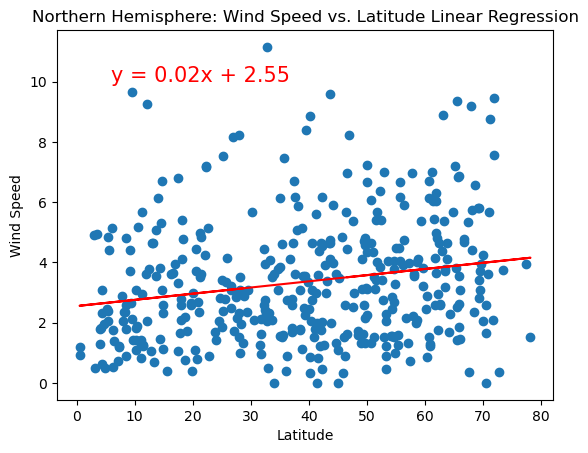

<Figure size 640x480 with 0 Axes>

In [57]:
# Northern Hemisphere
#x, y values
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Northern Hemisphere Lat Wind Speed.png')

Regression line equation is: y = -0.02x + 2.89


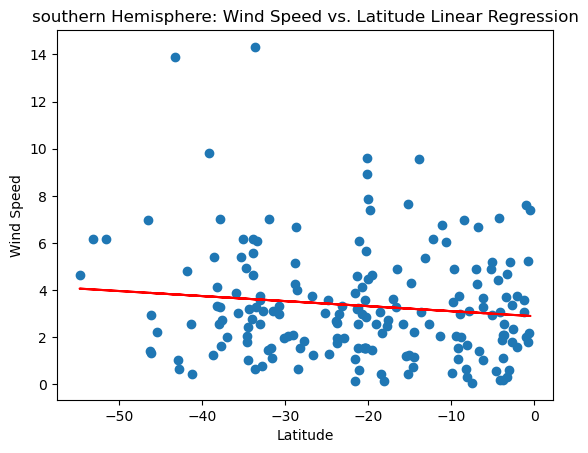

<Figure size 640x480 with 0 Axes>

In [58]:
# Southern Hemisphere
#x, y values
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
#regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

#plotting scatter plot and lines
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Add labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('southern Hemisphere: Wind Speed vs. Latitude Linear Regression')

plt.show()
plt.savefig(f'../output_data/Wind Speed Hemisphere Lat Cloudiness.png')

Wind Speed vs. Latitude analysis:

There is no corrilation between wind speed and latitude in the northern hemisphere, but there is slight coorilation in the southern hemisphere. 